# Pronóstico de el interés por los Cupcakes en el internet

In [5]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Import data
df =  pd.read_csv('/home/claudio/Git/Estadistica_iii/Clase_14/cupcake.csv', header=0)
df.set_index('Mes',inplace=True)
df.columns=['value']
df.index= pd.to_datetime(df.index)

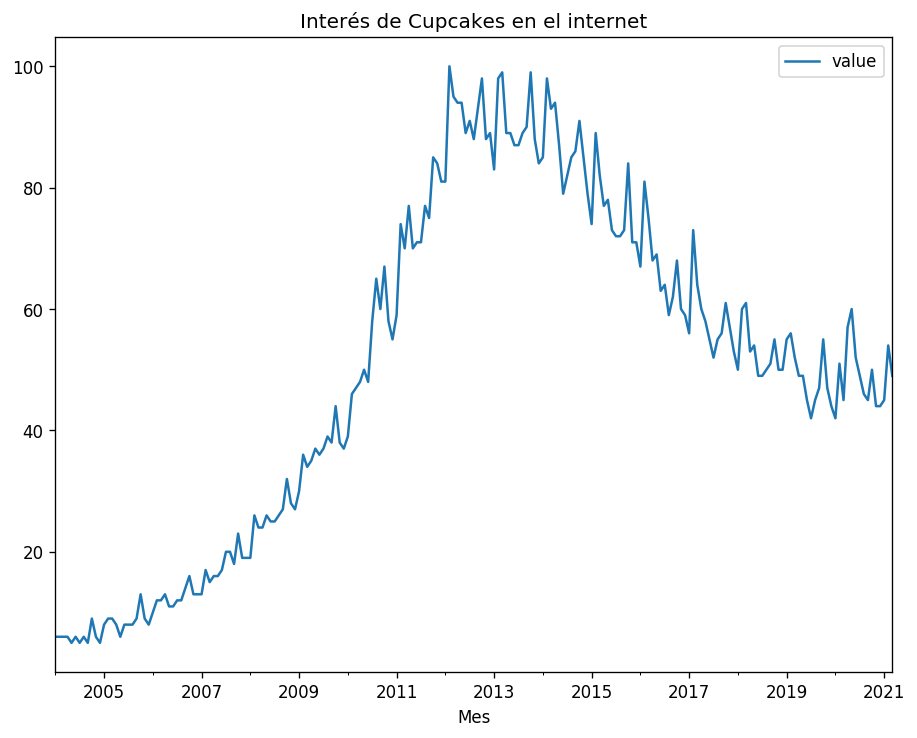

In [31]:
df.plot(title= "Interés de Cupcakes en el internet");

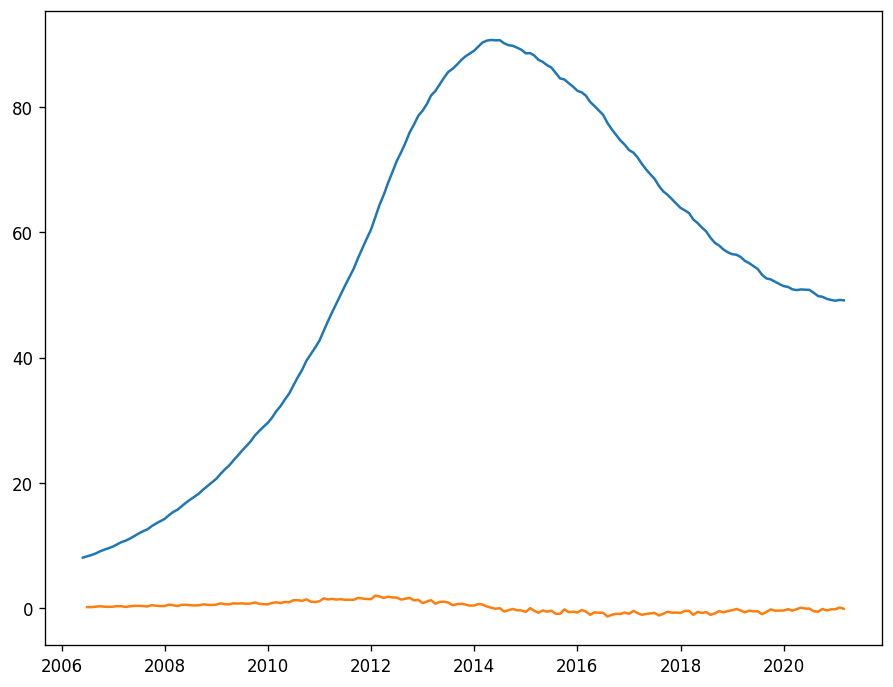

In [39]:
plt.plot(df.rolling(window = 30).mean())
plt.plot(df.diff().rolling(window = 30).mean())
plt.show()

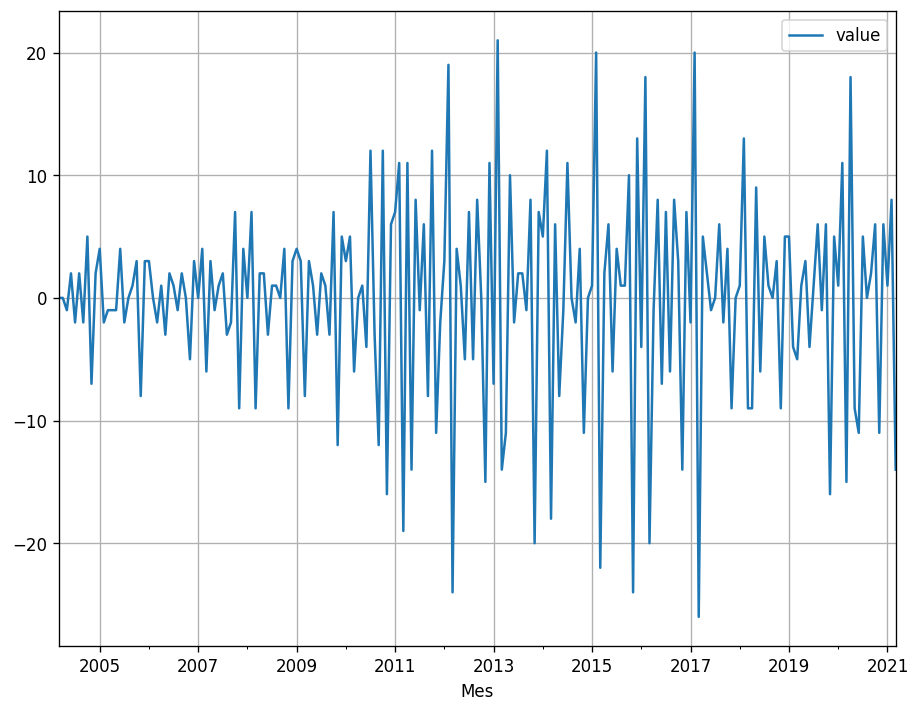

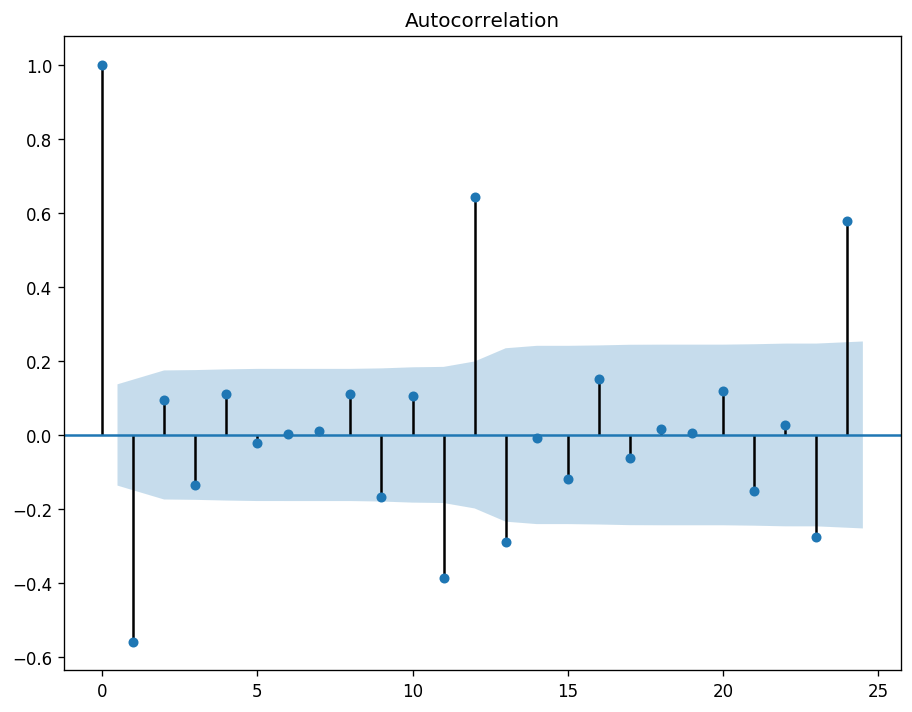

In [65]:
df_ =df.diff().diff().dropna()
df_.plot(grid=True)

plot_acf(df_)
plt.show()

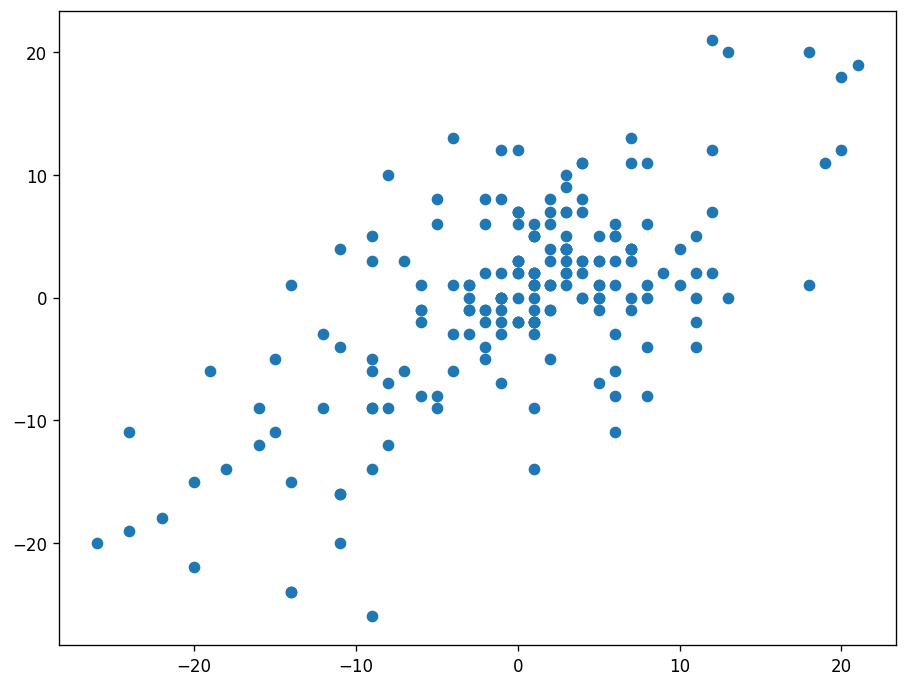

In [63]:
plt.scatter(df.diff().diff(),df.diff().diff().shift(12))

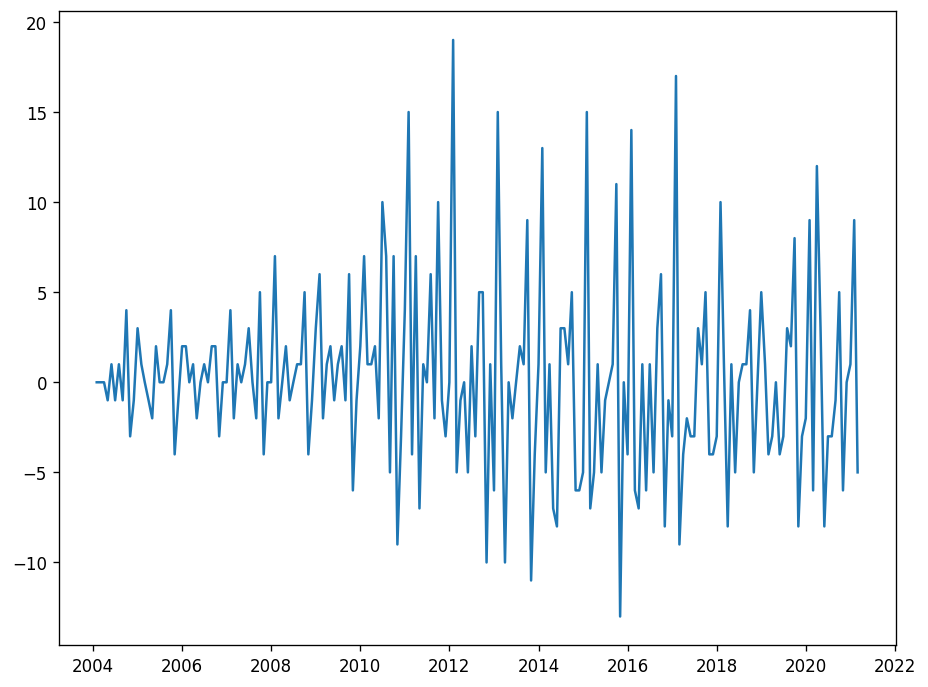

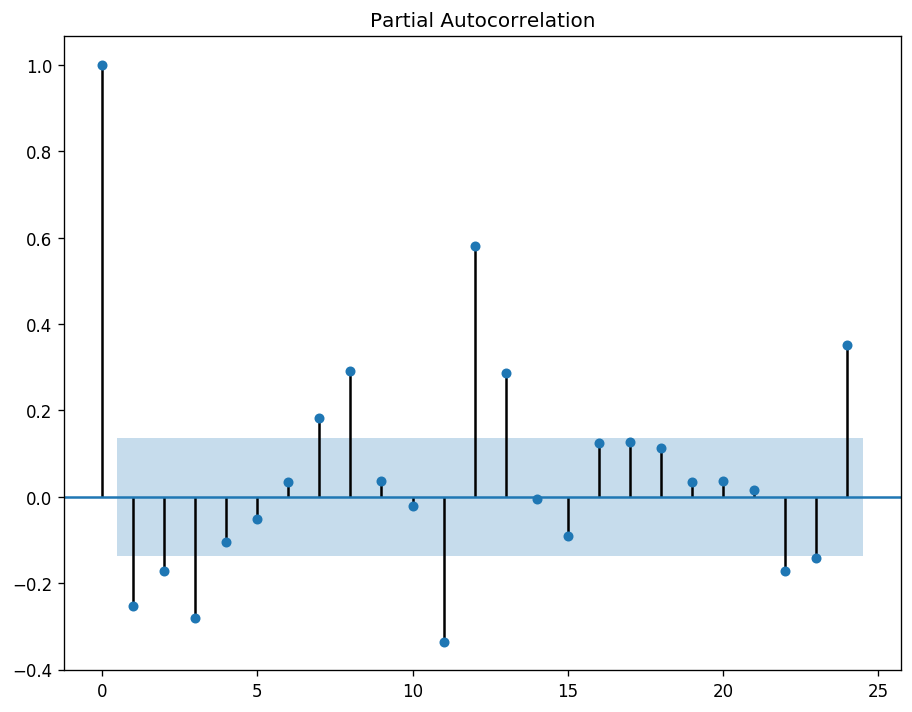

In [72]:
df_ =df.diff().dropna()
plt.plot(df_)

plot_pacf(df_)
plt.show()

In [77]:
model_fit.aic

1231.0140569970804

In [78]:
-0.3866/0.068

-5.685294117647058

In [76]:
# 3,2,1 ARIMA Model
model = ARIMA(df.value, order=(3,2,1))
model_fit = model.fit()
print(model_fit.summary())|

/home/claudio/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/claudio/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                             ARIMA Model Results                              
Dep. Variable:               D2.value   No. Observations:                  205
Model:                 ARIMA(3, 2, 1)   Log Likelihood                -609.507
Method:                       css-mle   S.D. of innovations              4.684
Date:                Thu, 25 Mar 2021   AIC                           1231.014
Time:                        18:50:49   BIC                           1250.952
Sample:                    03-01-2004   HQIC                          1239.079
                         - 03-01-2021                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0026      0.009     -0.285      0.776      -0.021       0.016
ar.L1.D2.value    -0.3866      0.068     -5.717      0.000      -0.519      -0.254
ar.L2.D2.value    -0.3034      0.070

/home/claudio/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/claudio/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


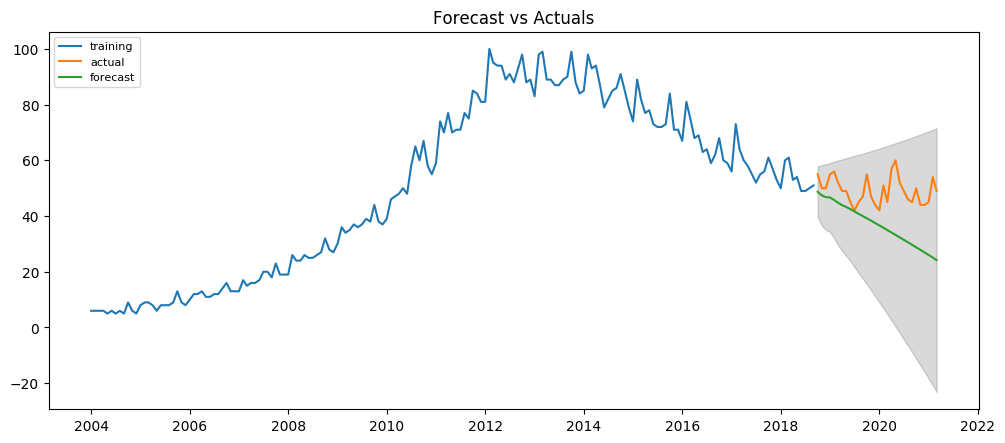

In [84]:
from statsmodels.tsa.stattools import acf

h = 30
# Create Training and Test
train = df.value[:(207-h)]
test = df.value[(207-h):]

# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(3, 2, 1))  
fitted = model.fit(disp=0)  

# Forecast
fc, se, conf = fitted.forecast(h, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [85]:
# 1,1,2 ARIMA Model
model = ARIMA(df.value, order=(1,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

/home/claudio/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/claudio/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                  206
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -615.743
Method:                       css-mle   S.D. of innovations              4.805
Date:                Thu, 25 Mar 2021   AIC                           1241.485
Time:                        19:11:06   BIC                           1258.125
Sample:                    02-01-2004   HQIC                          1248.215
                         - 03-01-2021                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2105      0.169      1.244      0.213      -0.121       0.542
ar.L1.D.value     0.0733      0.245      0.300      0.764      -0.406       0.553
ma.L1.D.value    -0.4331      0.236     

/home/claudio/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/claudio/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


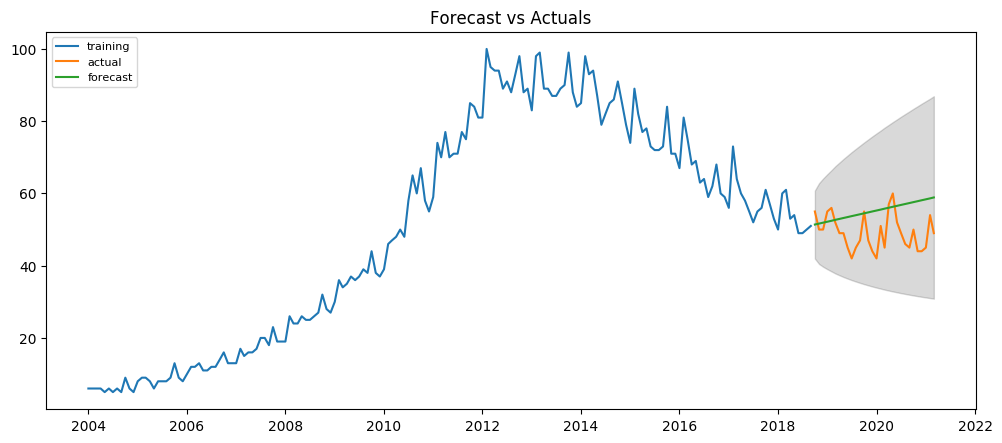

In [87]:
h = 30
# Create Training and Test
train = df.value[:(207-h)]
test = df.value[(207-h):]

# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(1,1,2))  
fitted = model.fit(disp=0)  

# Forecast
fc, se, conf = fitted.forecast(h, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [88]:
# 1,1,1 ARIMA Model
model = ARIMA(df.value, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                  206
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -616.083
Method:                       css-mle   S.D. of innovations              4.813
Date:                Thu, 25 Mar 2021   AIC                           1240.166
Time:                        19:13:54   BIC                           1253.478
Sample:                    02-01-2004   HQIC                          1245.550
                         - 03-01-2021                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2110      0.171      1.233      0.218      -0.124       0.546
ar.L1.D.value     0.2458      0.108      2.275      0.023       0.034       0.458
ma.L1.D.value    -0.6175      0.076     

/home/claudio/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/claudio/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


/home/claudio/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/claudio/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


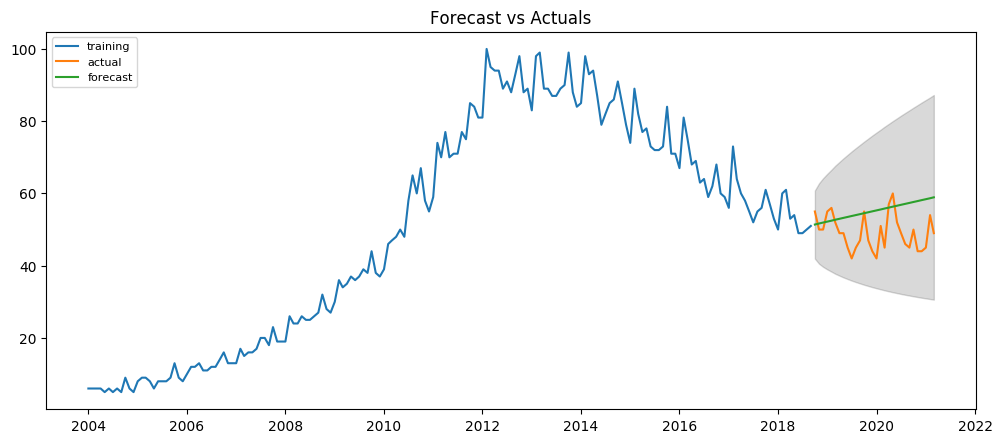

In [89]:
h = 30
# Create Training and Test
train = df.value[:(207-h)]
test = df.value[(207-h):]

# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(1,1,1))  
fitted = model.fit(disp=0)  

# Forecast
fc, se, conf = fitted.forecast(h, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

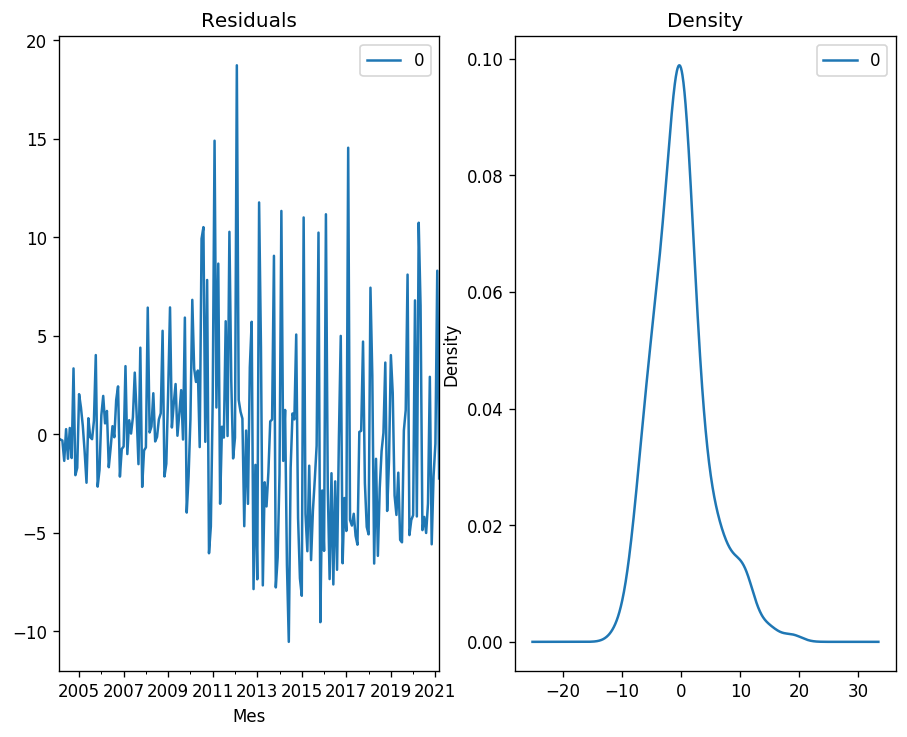

In [90]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

/home/claudio/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/claudio/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


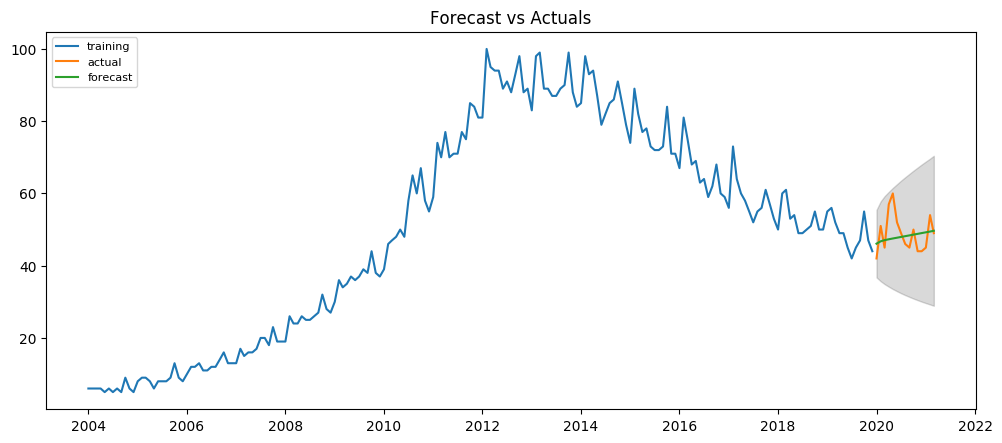

In [25]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = df.value[:192]
test = df.value[192:]

# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(15, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

/home/claudio/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/claudio/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                             ARIMA Model Results                              
Dep. Variable:               D2.value   No. Observations:                  190
Model:                 ARIMA(3, 2, 1)   Log Likelihood                -561.403
Method:                       css-mle   S.D. of innovations              4.595
Date:                Thu, 25 Mar 2021   AIC                           1134.806
Time:                        17:52:18   BIC                           1154.288
Sample:                    03-01-2004   HQIC                          1142.698
                         - 12-01-2019                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0046      0.010     -0.460      0.645      -0.024       0.015
ar.L1.D2.value    -0.3957      0.070     -5.658      0.000      -0.533      -0.259
ar.L2.D2.value    -0.3206      0.072

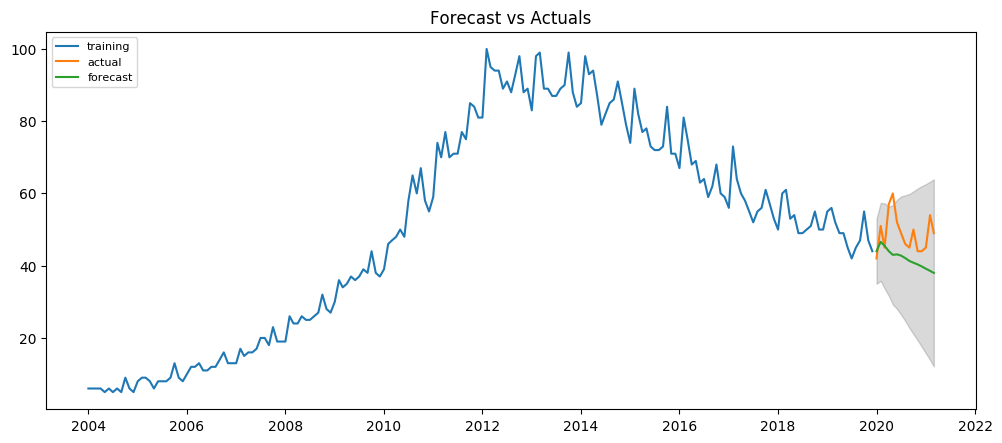

In [26]:
# Build Model
model = ARIMA(train, order=(3, 2, 1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(15, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [92]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)


{'mape': 0.1516099100682836,
 'me': 6.0399541490736715,
 'mae': 7.040345812825475,
 'mpe': 0.13390656303555423,
 'rmse': 8.249319567610488,
 'acf1': 0.5303631475344218,
 'corr': -0.21371274228347636,
 'minmax': 0.12546635273065332}

In [98]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

#df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)

model = pm.auto_arima(df.value, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1240.166, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1264.486, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1252.985, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1242.990, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1262.823, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1240.332, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1241.485, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1239.572, Time=0.07 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1241.118, Time=0.14 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1241.119, Time=0.21 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1239.076, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1242.227, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1240.993, Time=0.12 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=1240.633, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0]          

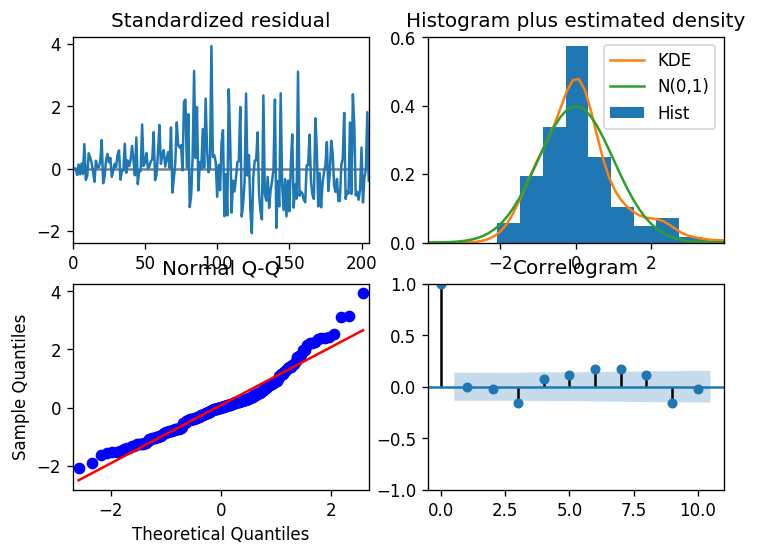

In [99]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

/home/claudio/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/claudio/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                  176
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -526.170
Method:                       css-mle   S.D. of innovations              4.807
Date:                Thu, 25 Mar 2021   AIC                           1060.340
Time:                        19:25:27   BIC                           1073.022
Sample:                    02-01-2004   HQIC                          1065.483
                         - 09-01-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2583      0.188      1.374      0.169      -0.110       0.627
ma.L1.D.value    -0.3647      0.072     -5.075      0.000      -0.506      -0.224
ma.L2.D.value    -0.1200      0.060     

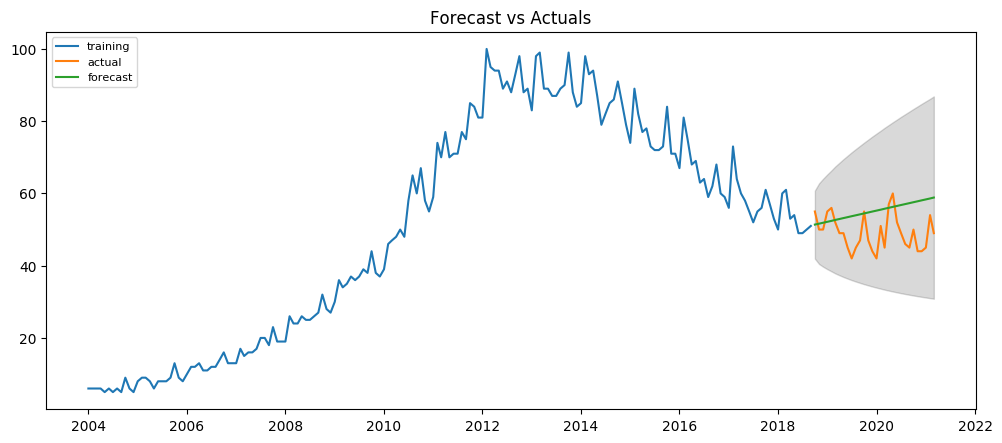

In [96]:
# Build Model
model = ARIMA(train, order=(0,1,2))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

# Forecasta
fc, se, conf = fitted.forecast(30, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

AttributeError: 'ARIMA' object has no attribute 'plot_diagnostics'